<a href="https://colab.research.google.com/github/QuetzaFdz/Evaluacion/blob/main/Actividad_5_(Evaluaci%C3%B3n)__California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [12]:
cal=pd.read_csv('California.csv')
cal2=cal.copy()

# **ETAPA 1: Preprocesamiento de DATOS**

In [13]:
print('\n Información general \n')
info=cal.info()
display(info)

print('\n Conteo de valores nulos \n')
nuloscal=cal.isnull().sum()
display(nuloscal)

#Descarga de valores nulos
#from google.colab import files
#nuloscal.to_excel('Nulos.xlsx')
#files.download('Nulos.xlsx')


 Información general 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6889 non-null   object 
 7   neighborhood_overview                         4850 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                

None


 Conteo de valores nulos 



id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1325
Length: 75, dtype: int64

In [14]:
#Realizamos limpieza para no tener valores nulos
cal2['description']=cal2['description'].fillna('Sin descripción')
cal2['neighborhood_overview']=cal2['neighborhood_overview'].fillna('Sin vecinos')
cal2['host_location']=cal2['host_location'].fillna('Sin dirección')
cal2['host_about']=cal2['host_about'].fillna('Sin descripción')
cal2['host_response_time']=cal2['host_response_time'].fillna('0')
cal2['host_response_rate']=cal2['host_response_rate'].fillna('0')
cal2['host_acceptance_rate']=cal2['host_acceptance_rate'].fillna('0')
cal2['host_is_superhost']=cal['host_is_superhost'].fillna('Sin información')
cal2['host_neighbourhood']=cal2['host_neighbourhood'].fillna('Sin vecinos')
cal2['neighbourhood']=cal2['neighbourhood'].fillna('Sin vecinos')
cal2=cal2.drop(['neighbourhood_group_cleansed'],axis=1)
cal2=cal2.drop(['bathrooms'],axis=1)
cal2['bathrooms_text']=cal2['bathrooms_text'].fillna('Sin baños')
cal2['bedrooms']=cal2['bedrooms'].fillna(round(cal['bedrooms'].mean(),1))
cal2['beds']=cal2['beds'].fillna(round(cal['beds'].mean(),1))
cal2['minimum_minimum_nights']=cal2['minimum_minimum_nights'].fillna('0')
cal2['maximum_minimum_nights']=cal2['maximum_minimum_nights'].fillna('0')
cal2['minimum_maximum_nights']=cal2['minimum_maximum_nights'].fillna('0')
cal2['maximum_maximum_nights']=cal2['maximum_maximum_nights'].fillna('0')
cal2['minimum_nights_avg_ntm']=cal2['minimum_nights_avg_ntm'].fillna('0')
cal2['maximum_nights_avg_ntm']=cal2['maximum_nights_avg_ntm'].fillna('0')
cal2=cal2.drop(['calendar_updated'],axis=1)
cal2['first_review']=cal2['first_review'].fillna('Sin fecha')
cal2['last_review']=cal2['last_review'].fillna('Sin fecha')
cal2['review_scores_rating']=cal2['review_scores_rating'].fillna(round(cal['review_scores_rating'].mean(),1))
cal2['review_scores_accuracy']=cal2['review_scores_accuracy'].fillna(round(cal['review_scores_accuracy'].mean(),1))
cal2['review_scores_cleanliness']=cal2['review_scores_cleanliness'].fillna(round(cal['review_scores_cleanliness'].mean(),1))
cal2['review_scores_checkin']=cal2['review_scores_checkin'].fillna(round(cal['review_scores_checkin'].mean(),1))
cal2['review_scores_communication']=cal2['review_scores_communication'].fillna(round(cal['review_scores_communication'].mean(),1))
cal2['review_scores_location']=cal2['review_scores_location'].fillna(round(cal['review_scores_location'].mean(),1))
cal2['review_scores_value']=cal2['review_scores_value'].fillna(round(cal['review_scores_value'].mean(),1))
cal2['license']=cal2['license'].fillna('Sin información')
cal2['reviews_per_month']=cal2['reviews_per_month'].fillna('0')

#Volvemos a realizar el conteo de valores nulos
nuloscal=cal2.isnull().sum()
nuloscaltotal=cal2.isnull().sum().sum()
display(nuloscal)
print('Total nulos')
display(nuloscaltotal)

cal2.info()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 72, dtype: int64

Total nulos


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6936 non-null   float64
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6936 non-null   object 
 7   neighborhood_overview                         6936 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [15]:
#Separar columnas cualitativas de cuantitativas
cuali=cal2.iloc[:,[1,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,24,25,26,27,28,30,31,32,34,37,38,47,52,56,57,65,66]]
cuanti=cal2.iloc[:,[2,9,22,23,29,33,35,36,39,40,41,42,43,44,45,46,48,49,50,51,53,54,55,58,59,60,61,62,63,64,67,68,69,70,71]]
display(cuanti)

,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.020000e+13,1169,1,1,37.770280,3,1.0,2.0,2,30,...,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.31
1,2.020000e+13,8904,2,2,37.744740,4,2.0,2.0,30,60,...,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.66
2,2.020000e+13,21994,13,14,37.765550,1,1.0,1.0,32,90,...,4.44,4.78,4.78,4.67,4.67,13,0,13,0,0.09
3,2.020000e+13,24215,2,6,37.775640,4,2.0,2.0,9,91,...,5.00,4.94,5.00,4.94,4.75,2,2,0,0,0.17
4,2.020000e+13,7149,2,2,37.760300,3,1.0,1.0,1,26,...,4.94,4.95,4.96,4.93,4.74,2,0,2,0,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,2.020000e+13,495900269,9,9,37.791994,2,1.0,1.0,1,28,...,4.80,4.90,4.90,4.80,4.70,5,5,0,0,0
6932,2.020000e+13,499392537,1,1,37.763060,2,1.0,1.0,1,7,...,5.00,5.00,5.00,5.00,5.00,1,1,0,0,1.0
6933,2.020000e+13,499294716,1,1,37.777633,1,1.0,1.0,31,60,...,4.80,4.90,4.90,4.80,4.70,1,0,1,0,0
6934,2.020000e+13,485596413,3,4,37.738325,2,1.0,1.0,1,7,...,4.80,4.90,4.90,4.80,4.70,3,0,3,0,0


In [16]:
#Análisis con metofología de desviación estandar
y=cuanti
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

print('\n Outliers \n')
outliers= cuanti[(y>Limite_Superior)|(y<Limite_Inferior)]
display(outliers)

print('\n Datos que no son outliers \n')
data_clean= cuanti[(y<=Limite_Superior)&(y>=Limite_Inferior)]
display(data_clean)

print('\n Promedio de los outliers \n')
g2m=cuanti.fillna(round(cuanti.mean(),1))
display(g2m)

print('\n Tablas concatenadas \n')
todo=pd.concat([cuali,g2m],axis=1)
todo

Limite superior permitido scrape_id                                       2.020000e+13
host_id                                         5.371002e+08
host_listings_count                             2.300397e+03
host_total_listings_count                       2.842239e+03
latitude                                        3.783716e+01
accommodates                                    9.034994e+00
bedrooms                                        4.070980e+00
beds                                            5.370675e+00
minimum_nights                                  1.755102e+02
maximum_nights                                  3.662171e+04
availability_30                                 4.639164e+01
availability_60                                 9.577126e+01
availability_90                                 1.465721e+02
availability_365                                5.574500e+02
number_of_reviews                               3.315465e+02
number_of_reviews_ltm                           7.831711e+0

<ipython-input-16-d2eff5ae1cf7>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-16-d2eff5ae1cf7>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-16-d2eff5ae1cf7>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence th

,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-16-d2eff5ae1cf7>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean= cuanti[(y<=Limite_Superior)&(y>=Limite_Inferior)]



 Datos que no son outliers 



,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.020000e+13,1169,1.0,1.0,37.770280,3.0,1.0,2.0,2.0,30.0,...,4.92,4.95,4.88,4.98,4.76,1.0,1.0,0.0,0.0,NaN
1,2.020000e+13,8904,2.0,2.0,37.744740,4.0,2.0,2.0,30.0,60.0,...,4.87,4.89,4.85,4.77,4.68,1.0,1.0,0.0,0.0,NaN
2,2.020000e+13,21994,13.0,14.0,37.765550,1.0,1.0,1.0,32.0,90.0,...,4.44,4.78,4.78,4.67,4.67,13.0,0.0,13.0,0.0,NaN
3,2.020000e+13,24215,2.0,6.0,37.775640,4.0,2.0,2.0,9.0,91.0,...,5.00,4.94,5.00,4.94,4.75,2.0,2.0,0.0,0.0,NaN
4,2.020000e+13,7149,2.0,2.0,37.760300,3.0,1.0,1.0,1.0,26.0,...,4.94,4.95,4.96,4.93,4.74,2.0,0.0,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,2.020000e+13,495900269,9.0,9.0,37.791994,2.0,1.0,1.0,1.0,28.0,...,4.80,4.90,4.90,4.80,4.70,5.0,5.0,0.0,0.0,NaN
6932,2.020000e+13,499392537,1.0,1.0,37.763060,2.0,1.0,1.0,1.0,7.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,NaN
6933,2.020000e+13,499294716,1.0,1.0,37.777633,1.0,1.0,1.0,31.0,60.0,...,4.80,4.90,4.90,4.80,4.70,1.0,0.0,1.0,0.0,NaN
6934,2.020000e+13,485596413,3.0,4.0,37.738325,2.0,1.0,1.0,1.0,7.0,...,4.80,4.90,4.90,4.80,4.70,3.0,0.0,3.0,0.0,NaN



 Promedio de los outliers 



<ipython-input-16-d2eff5ae1cf7>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  g2m=cuanti.fillna(round(cuanti.mean(),1))


,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.020000e+13,1169,1,1,37.770280,3,1.0,2.0,2,30,...,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.31
1,2.020000e+13,8904,2,2,37.744740,4,2.0,2.0,30,60,...,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.66
2,2.020000e+13,21994,13,14,37.765550,1,1.0,1.0,32,90,...,4.44,4.78,4.78,4.67,4.67,13,0,13,0,0.09
3,2.020000e+13,24215,2,6,37.775640,4,2.0,2.0,9,91,...,5.00,4.94,5.00,4.94,4.75,2,2,0,0,0.17
4,2.020000e+13,7149,2,2,37.760300,3,1.0,1.0,1,26,...,4.94,4.95,4.96,4.93,4.74,2,0,2,0,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,2.020000e+13,495900269,9,9,37.791994,2,1.0,1.0,1,28,...,4.80,4.90,4.90,4.80,4.70,5,5,0,0,0
6932,2.020000e+13,499392537,1,1,37.763060,2,1.0,1.0,1,7,...,5.00,5.00,5.00,5.00,5.00,1,1,0,0,1.0
6933,2.020000e+13,499294716,1,1,37.777633,1,1.0,1.0,31,60,...,4.80,4.90,4.90,4.80,4.70,1,0,1,0,0
6934,2.020000e+13,485596413,3,4,37.738325,2,1.0,1.0,1,7,...,4.80,4.90,4.90,4.80,4.70,3,0,3,0,0



 Tablas concatenadas 



,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,...,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.31
1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,...,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.66
2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,...,4.44,4.78,4.78,4.67,4.67,13,0,13,0,0.09
3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,02/07/2009,...,5.00,4.94,5.00,4.94,4.75,2,2,0,0,0.17
4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,27/01/2009,...,4.94,4.95,4.96,4.93,4.74,2,0,2,0,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,https://www.airbnb.com/rooms/818195233784141985,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/495900269,Powell,13/01/2023,...,4.80,4.90,4.90,4.80,4.70,5,5,0,0,0
6932,https://www.airbnb.com/rooms/818231243893035313,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/499392537,Michaiel,03/02/2023,...,5.00,5.00,5.00,5.00,5.00,1,1,0,0,1.0
6933,https://www.airbnb.com/rooms/818396267693629070,06/03/2023,city scrape,Heart of SF ! Close by to Everything,- In-unit washer/dryer<br />-Walk-in Closet <b...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/499294716,Sushma,02/02/2023,...,4.80,4.90,4.90,4.80,4.70,1,0,1,0,0
6934,https://www.airbnb.com/rooms/818474518435984613,06/03/2023,city scrape,Private room #2 in SF,Enjoy a memorable visit when you stay at our A...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/485596413,Lirong,29/10/2022,...,4.80,4.90,4.90,4.80,4.70,3,0,3,0,0


In [17]:
#from google.colab import files
#todo.to_csv("California_limpio.csv")
#files.download("California_limpio.csv")

# **ETAPA 2: Extracción  de DATOS**

In [18]:
#host_acceptance_rate> 50%
todo['host_acceptance_rate']=todo['host_acceptance_rate'].astype(float)
har=todo[todo['host_acceptance_rate']>.5]
har

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,...,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.31
1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,...,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.66
2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,...,4.44,4.78,4.78,4.67,4.67,13,0,13,0,0.09
4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,27/01/2009,...,4.94,4.95,4.96,4.93,4.74,2,0,2,0,4.65
5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/656263,Noreen,02/06/2011,...,4.88,4.95,4.97,4.78,4.80,1,1,0,0,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,https://www.airbnb.com/rooms/817067809700979706,06/03/2023,city scrape,Modern Room in San Francisco - 8,Beautiful comfortable room in a quiet neighbor...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/222540569,John,25/10/2018,...,4.89,5.00,5.00,4.56,4.89,7,0,7,0,8.44
6927,https://www.airbnb.com/rooms/817390268252267687,06/03/2023,city scrape,Charming hotel room in downtown,Enjoy easy access to popular shops and restaur...,Russian Hill is directly to the north (and sli...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/486687635,Allen,07/11/2022,...,5.00,5.00,5.00,5.00,5.00,26,0,26,0,1.0
6929,https://www.airbnb.com/rooms/817686120681200035,06/03/2023,city scrape,SF Spacious Room w/Kitchen/Patio/ComfyBed/Laundry,Our home is carefully designed for long-term s...,This residential neighborhood is quiet with fa...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/226555948,Gi'Angelo,19/11/2018,...,4.80,4.90,4.90,4.80,4.70,14,3,11,0,0
6930,https://www.airbnb.com/rooms/818185441952600448,06/03/2023,city scrape,# F - Convenient Potrero Hill Stay. Book Today.,Convenient Stay. Book Potrero Hill Today.<br /...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/286802480,Henry,18/08/2019,...,4.80,4.90,4.90,4.80,4.70,6,0,6,0,0


In [19]:
#Sólo los registros con categoría “superhost”
csh=todo[todo["host_is_superhost"] == "t"]
csh

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,...,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.31
4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,27/01/2009,...,4.94,4.95,4.96,4.93,4.74,2,0,2,0,4.65
7,https://www.airbnb.com/rooms/10537,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/36752,Teresa,07/09/2009,...,5.00,4.86,5.00,4.14,4.46,2,0,2,0,0.12
8,https://www.airbnb.com/rooms/491867,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/969518,Sona,14/08/2011,...,4.86,4.98,4.91,4.91,4.75,1,1,0,0,0.44
9,https://www.airbnb.com/rooms/144242,06/03/2023,city scrape,Lake Street Single Family Home,Our full-time home (available when we are away...,Sin vecinos,https://a0.muscache.com/pictures/c175c400-edad...,https://www.airbnb.com/users/show/699215,Kate,14/06/2011,...,4.89,5.00,5.00,4.89,4.95,1,1,0,0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,https://www.airbnb.com/rooms/815561340398335999,06/03/2023,city scrape,"Spacious Studio w/ Kitchenette, Private Bath &...",Enjoy our spacious studio with modern amenitie...,Our house is conveniently located near Freeway...,https://a0.muscache.com/pictures/96bb96cd-6626...,https://www.airbnb.com/users/show/36046172,Rosie,17/06/2015,...,5.00,5.00,5.00,5.00,5.00,2,0,2,0,4.0
6918,https://www.airbnb.com/rooms/816211107298614925,06/03/2023,previous scrape,Cozy room in the heart of SF,Enjoy everything SF has to offer in this cozy ...,The house is in Mission Dolores which is centr...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/375566645,Mark,13/11/2020,...,4.80,4.90,4.90,4.80,4.70,14,0,14,0,0
6919,https://www.airbnb.com/rooms/816849292948023117,06/03/2023,city scrape,Elegant and Spacious 2bdrm 2bth,Great location:<br />â€¢ Steps away from prime...,Great location:<br />â€¢ Steps away from prime...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/330231,Richard,29/12/2010,...,4.80,4.90,4.90,4.80,4.70,10,10,0,0,0
6923,https://www.airbnb.com/rooms/816998498709351546,06/03/2023,previous scrape,Live-Work Downtown San Francisco Loft,Furnished Live-Work NY-style loft with exposed...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/4452428,Sebastien,20/12/2012,...,4.80,4.90,4.90,4.80,4.70,1,1,0,0,0


In [20]:
#Los registros que no hallan verificado identidad “ not identity_verified”
hiv=todo[todo['host_identity_verified']=='f']
hiv

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,https://www.airbnb.com/rooms/490931,06/03/2023,city scrape,"Mission's ""La Lengua""",Sunny apt in a great corner of the Mission. Y...,"great food, bars, and walk to everything, incl...",https://a0.muscache.com/pictures/5841012/ee765...,https://www.airbnb.com/users/show/1269188,Maureen,09/10/2011,...,4.75,4.70,4.78,4.77,4.66,1,0,1,0,0.74
28,https://www.airbnb.com/rooms/18231,06/03/2023,city scrape,Loft-like Apt./Garden,"Located on 26th St. in wonderful Noe Valley, t...",We love Noe Valley. It is a wonderful friendly...,https://a0.muscache.com/pictures/145020/505b89...,https://www.airbnb.com/users/show/70224,Arlene Helfand,13/01/2010,...,4.84,4.95,4.90,4.89,4.75,1,1,0,0,0.44
38,https://www.airbnb.com/rooms/193292,06/03/2023,city scrape,Nice Rooms With Private 1/2 Bath,<b>The space</b><br />Please come and enjoy ou...,Sin vecinos,https://a0.muscache.com/pictures/1783939/e4fa3...,https://www.airbnb.com/users/show/937281,Lauren&Sarah,07/08/2011,...,4.97,4.98,5.00,4.95,4.90,1,0,1,0,0.46
39,https://www.airbnb.com/rooms/201313,06/03/2023,city scrape,Fully Furnished 1 bedroom apartment,"Tastefully decorated modern one bedroom, one b...",Location is prime! You are located within a sh...,https://a0.muscache.com/pictures/c96832f5-2ece...,https://www.airbnb.com/users/show/984585,Robb,17/08/2011,...,5.00,5.00,5.00,5.00,4.00,1,1,0,0,0.05
71,https://www.airbnb.com/rooms/231129,06/03/2023,city scrape,Nob Hill Mini Mansion,The Dollhouse offers the opportunity to experi...,Sin vecinos,https://a0.muscache.com/pictures/2123962/10ffd...,https://www.airbnb.com/users/show/1208533,Antonio,25/09/2011,...,4.56,4.31,4.38,4.84,4.28,5,1,4,0,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,https://www.airbnb.com/rooms/808995594566778409,06/03/2023,city scrape,8A-Private Room (share bath) at Marina/Cow Hollow,Our quiet private room is located at the inter...,Our room offers access to both the Marina and ...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/157999191,Berlin,09/11/2017,...,4.80,4.90,4.90,4.80,4.70,24,1,23,0,0
6905,https://www.airbnb.com/rooms/813099498776240866,06/03/2023,city scrape,Spacious Suite with Private Bath,Spacious and charming bedroom with work desk a...,Property is located in the quaint Lakeshore ne...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/240202942,Sam,31/01/2019,...,5.00,5.00,5.00,4.50,5.00,2,2,0,0,2.0
6931,https://www.airbnb.com/rooms/818195233784141985,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/495900269,Powell,13/01/2023,...,4.80,4.90,4.90,4.80,4.70,5,5,0,0,0
6932,https://www.airbnb.com/rooms/818231243893035313,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/499392537,Michaiel,03/02/2023,...,5.00,5.00,5.00,5.00,5.00,1,1,0,0,1.0


In [21]:
#Los registros cuyo property_type = "Private room" y "Hotel Room"
y=todo[(todo["property_type"] == 'Private room') | (todo["property_type"] == 'Hotel Room')]
y

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,https://www.airbnb.com/rooms/10537,06/03/2023,city scrape,Elegant & Cozy w/City views. Private room: Purple,Casa de Paz (House of Peace) is like staying w...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/36752,Teresa,07/09/2009,...,5.00,4.86,5.00,4.14,4.46,2,0,2,0,0.12
1575,https://www.airbnb.com/rooms/14305759,06/03/2023,city scrape,Mission District Private Yoga Room for two,Take a moment for mindfulness. Give yourself t...,Great Neighborhood with many Restaurants nearby.,https://a0.muscache.com/pictures/75847296-c23b...,https://www.airbnb.com/users/show/29483318,James,17/03/2015,...,3.84,4.76,4.81,4.67,4.34,3,0,3,0,1.45
2049,https://www.airbnb.com/rooms/20957462,06/03/2023,city scrape,Sunny Studio with Golden Gate Bridge View,Bright and quiet studio in vibrant Russian Hil...,Sin vecinos,https://a0.muscache.com/pictures/d998ca8d-f6fa...,https://www.airbnb.com/users/show/150732464,Salman,15/09/2017,...,4.44,4.78,4.94,4.72,4.44,7,5,2,0,0.3
4014,https://www.airbnb.com/rooms/43477461,06/03/2023,city scrape,Bright Nice Studio,Sin descripción,Sin vecinos,https://a0.muscache.com/pictures/e45d07d1-947e...,https://www.airbnb.com/users/show/150732464,Salman,15/09/2017,...,5.00,5.00,5.00,5.00,3.50,7,5,2,0,0.16


In [22]:
#Los registros que cuenten con bathroom > 1
mq=todo[(todo["bathrooms_text"] == '1 bath') | (todo["bathrooms_text"] == '0 baths') | (todo["bathrooms_text"] == '0 shared baths')]
mq

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,...,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.31
1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,...,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.66
5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/656263,Noreen,02/06/2011,...,4.88,4.95,4.97,4.78,4.80,1,1,0,0,1.69
6,https://www.airbnb.com/rooms/490931,06/03/2023,city scrape,"Mission's ""La Lengua""",Sunny apt in a great corner of the Mission. Y...,"great food, bars, and walk to everything, incl...",https://a0.muscache.com/pictures/5841012/ee765...,https://www.airbnb.com/users/show/1269188,Maureen,09/10/2011,...,4.75,4.70,4.78,4.77,4.66,1,0,1,0,0.74
10,https://www.airbnb.com/rooms/10578,06/03/2023,city scrape,Classic Nob Hill Studio - Roof Deck,A cute studio with nice street views and lots ...,Very centrally located. <br /><br />Fishermans...,https://a0.muscache.com/pictures/2249128/7f7ce...,https://www.airbnb.com/users/show/37049,Andrew,08/09/2009,...,4.94,4.81,4.94,4.82,4.75,1,1,0,0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923,https://www.airbnb.com/rooms/816998498709351546,06/03/2023,previous scrape,Live-Work Downtown San Francisco Loft,Furnished Live-Work NY-style loft with exposed...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/4452428,Sebastien,20/12/2012,...,4.80,4.90,4.90,4.80,4.70,1,1,0,0,0
6928,https://www.airbnb.com/rooms/817535225433481370,06/03/2023,city scrape,Unique custom loft - South Beach,Historical loft building in safe+clean South B...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/9835117,Nikita,05/11/2013,...,4.80,4.90,4.90,4.80,4.70,1,1,0,0,0
6931,https://www.airbnb.com/rooms/818195233784141985,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/495900269,Powell,13/01/2023,...,4.80,4.90,4.90,4.80,4.70,5,5,0,0,0
6932,https://www.airbnb.com/rooms/818231243893035313,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/499392537,Michaiel,03/02/2023,...,5.00,5.00,5.00,5.00,5.00,1,1,0,0,1.0


In [23]:
#Los registros cuyo precio sea mayor de $10,000 y que sean de tipo "Entire home"
y2=todo[(todo["price"] > 10000) & (todo["room_type"] == 'Entire home/apt')]
y2

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5759,https://www.airbnb.com/rooms/642886705473802703,06/03/2023,city scrape,Lovely 1-bedroom apartment with patio,Beautiful 1-bedroom perfect for the family who...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/32878131,Michelle,08/05/2015,...,4.8,4.9,4.9,4.8,4.7,1,1,0,0,0
6490,https://www.airbnb.com/rooms/785698957007308545,06/03/2023,city scrape,Park Presidio,Newly remodeled and economical two bedroom. W...,Located on Geary Boulevard near Park Presidio....,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/91333416,Jan,22/08/2016,...,4.8,4.9,4.9,4.8,4.7,25,25,0,0,0


In [24]:
#Los registros cuyo review_scores_cleanliness > 4.5
rsc=todo[todo['review_scores_cleanliness'] > 4.5]
rsc

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,...,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.31
1,https://www.airbnb.com/rooms/5858,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,https://www.airbnb.com/users/show/8904,Philip And Tania,02/03/2009,...,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.66
3,https://www.airbnb.com/rooms/8339,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/24215,Rosy,02/07/2009,...,5.00,4.94,5.00,4.94,4.75,2,2,0,0,0.17
4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,27/01/2009,...,4.94,4.95,4.96,4.93,4.74,2,0,2,0,4.65
5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/656263,Noreen,02/06/2011,...,4.88,4.95,4.97,4.78,4.80,1,1,0,0,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,https://www.airbnb.com/rooms/818195233784141985,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/495900269,Powell,13/01/2023,...,4.80,4.90,4.90,4.80,4.70,5,5,0,0,0
6932,https://www.airbnb.com/rooms/818231243893035313,06/03/2023,city scrape,â€¢ Cozy & Comfortable Castro Artist's Studio â€¢,You'll be in the perfect location to explore a...,"Lively and safe neighborhood, with a local lib...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/499392537,Michaiel,03/02/2023,...,5.00,5.00,5.00,5.00,5.00,1,1,0,0,1.0
6933,https://www.airbnb.com/rooms/818396267693629070,06/03/2023,city scrape,Heart of SF ! Close by to Everything,- In-unit washer/dryer<br />-Walk-in Closet <b...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/499294716,Sushma,02/02/2023,...,4.80,4.90,4.90,4.80,4.70,1,0,1,0,0
6934,https://www.airbnb.com/rooms/818474518435984613,06/03/2023,city scrape,Private room #2 in SF,Enjoy a memorable visit when you stay at our A...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/485596413,Lirong,29/10/2022,...,4.80,4.90,4.90,4.80,4.70,3,0,3,0,0


In [25]:
#Los registros cuyo review_scores_value > 4.9
rsv=todo[todo['review_scores_value'] > 4.9]
rsv

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
9,https://www.airbnb.com/rooms/144242,06/03/2023,city scrape,Lake Street Single Family Home,Our full-time home (available when we are away...,Sin vecinos,https://a0.muscache.com/pictures/c175c400-edad...,https://www.airbnb.com/users/show/699215,Kate,14/06/2011,...,4.89,5.00,5.00,4.89,4.95,1,1,0,0,0.15
24,https://www.airbnb.com/rooms/149108,06/03/2023,city scrape,Luxury UCSF Cole Valley Condo w/Tesla Charger,Our home is an absolute jewel box. It is secur...,"Cole Valley is a small, family-friendly commun...",https://a0.muscache.com/pictures/25525215/7e4b...,https://www.airbnb.com/users/show/719538,Margaret,19/06/2011,...,5.00,5.00,5.00,5.00,5.00,1,1,0,0,0.03
26,https://www.airbnb.com/rooms/12522,06/03/2023,previous scrape,Perfectly located Castro,1895 Victorian flat w/ 12 ft ceilings. (No Lon...,Sin vecinos,https://a0.muscache.com/pictures/9158991/d0fa6...,https://www.airbnb.com/users/show/18431,Brenda,22/05/2009,...,4.90,4.95,4.96,4.94,4.93,1,0,1,0,2.79
46,https://www.airbnb.com/rooms/530857,06/03/2023,city scrape,"Sunny, quiet private room with parking",1920's three bedroom house with a formal dinin...,2 blocks away is Broken Record. It's a whiskey...,https://a0.muscache.com/pictures/713aa5ff-4026...,https://www.airbnb.com/users/show/2607120,Gregory,11/06/2012,...,4.89,4.97,4.97,4.87,4.95,2,0,2,0,0.65
53,https://www.airbnb.com/rooms/561602,06/03/2023,city scrape,"Great view in the Mission, 15 mins by bus down...",Stunning view of SFâ€™s highest hill from your...,My house on a quiet brick cul-de-sac in Bernal...,https://a0.muscache.com/pictures/0dc1946f-936c...,https://www.airbnb.com/users/show/2760904,Matthew,27/06/2012,...,4.98,5.00,4.98,4.88,4.91,1,0,1,0,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,https://www.airbnb.com/rooms/816871631018815995,06/03/2023,city scrape,Queen Private - ADA,"A short walk from Fishermanâ€™s Wharf, home to...",Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/407298390,San Francisco,15/06/2021,...,5.00,5.00,5.00,5.00,5.00,9,0,5,4,1.0
6924,https://www.airbnb.com/rooms/817017027613797792,06/03/2023,city scrape,Modern Room in San Francisco - 6,Enjoy beautiful serene views of the San Franci...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/222540569,John,25/10/2018,...,5.00,5.00,5.00,5.00,5.00,7,0,7,0,1.0
6925,https://www.airbnb.com/rooms/817053637695588890,06/03/2023,city scrape,Modern Room in San Francisco - 7,Beautiful comfortable room in a quiet neighbor...,Home is located in the Bayview area overlookin...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/222540569,John,25/10/2018,...,5.00,5.00,5.00,5.00,5.00,7,0,7,0,2.0
6927,https://www.airbnb.com/rooms/817390268252267687,06/03/2023,city scrape,Charming hotel room in downtown,Enjoy easy access to popular shops and restaur...,Russian Hill is directly to the north (and sli...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/486687635,Allen,07/11/2022,...,5.00,5.00,5.00,5.00,5.00,26,0,26,0,1.0


In [26]:
#Los registros cuya availability_365 < 100
a=todo[todo['availability_365'] < 100]
a

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/656263,Noreen,02/06/2011,...,4.88,4.95,4.97,4.78,4.80,1,1,0,0,1.69
8,https://www.airbnb.com/rooms/491867,06/03/2023,city scrape,Central San Francisco Urban Dream,3 BR/2 BA Victorian flat beautifully restored ...,"Nearby market: Right out the front door, righ...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/969518,Sona,14/08/2011,...,4.86,4.98,4.91,4.91,4.75,1,1,0,0,0.44
9,https://www.airbnb.com/rooms/144242,06/03/2023,city scrape,Lake Street Single Family Home,Our full-time home (available when we are away...,Sin vecinos,https://a0.muscache.com/pictures/c175c400-edad...,https://www.airbnb.com/users/show/699215,Kate,14/06/2011,...,4.89,5.00,5.00,4.89,4.95,1,1,0,0,0.15
11,https://www.airbnb.com/rooms/144978,06/03/2023,city scrape,Prime Location - Small Basic Room,<b>The space</b><br />This is a small room in ...,Sin vecinos,https://a0.muscache.com/pictures/915742/ada9fb...,https://www.airbnb.com/users/show/216682,Jay,29/08/2010,...,4.45,4.86,4.81,4.82,4.67,9,4,5,0,0.85
15,https://www.airbnb.com/rooms/501770,06/03/2023,city scrape,Contemporary Home with Mid-Century Modern Design,The perfect San Francisco getaway retreat is w...,The apartment is centrally located in the Haig...,https://a0.muscache.com/pictures/58e2b55d-10e7...,https://www.airbnb.com/users/show/2475480,Arthur,27/05/2012,...,4.89,4.84,4.87,4.74,4.59,5,5,0,0,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,https://www.airbnb.com/rooms/815561340398335999,06/03/2023,city scrape,"Spacious Studio w/ Kitchenette, Private Bath &...",Enjoy our spacious studio with modern amenitie...,Our house is conveniently located near Freeway...,https://a0.muscache.com/pictures/96bb96cd-6626...,https://www.airbnb.com/users/show/36046172,Rosie,17/06/2015,...,5.00,5.00,5.00,5.00,5.00,2,0,2,0,4.0
6917,https://www.airbnb.com/rooms/816028610191508453,06/03/2023,city scrape,Hillside Gem in Noe Valley,Our stylish and modern junior 1-bedroom flat i...,Noe Valley in San Francisco is a family-friend...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/45555637,Aidan,01/10/2015,...,4.80,4.90,4.90,4.80,4.70,1,1,0,0,0
6918,https://www.airbnb.com/rooms/816211107298614925,06/03/2023,previous scrape,Cozy room in the heart of SF,Enjoy everything SF has to offer in this cozy ...,The house is in Mission Dolores which is centr...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/375566645,Mark,13/11/2020,...,4.80,4.90,4.90,4.80,4.70,14,0,14,0,0
6923,https://www.airbnb.com/rooms/816998498709351546,06/03/2023,previous scrape,Live-Work Downtown San Francisco Loft,Furnished Live-Work NY-style loft with exposed...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/4452428,Sebastien,20/12/2012,...,4.80,4.90,4.90,4.80,4.70,1,1,0,0,0


In [27]:
#Los registros cuya host_response_time sea "within an hour"
hrt=todo[todo['host_response_time'] == 'within an hour']
hrt

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/958,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,https://www.airbnb.com/users/show/1169,Holly,31/07/2008,...,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.31
2,https://www.airbnb.com/rooms/8142,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,https://www.airbnb.com/users/show/21994,Aaron,17/06/2009,...,4.44,4.78,4.78,4.67,4.67,13,0,13,0,0.09
4,https://www.airbnb.com/rooms/8739,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,https://www.airbnb.com/users/show/7149,Ivan & Wendy,27/01/2009,...,4.94,4.95,4.96,4.93,4.74,2,0,2,0,4.65
5,https://www.airbnb.com/rooms/142177,06/03/2023,city scrape,"Stylish, Spacious and Quiet Flat!",***Will consider small pets. One pet per stay...,Experience the real San Francisco and stay whe...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/656263,Noreen,02/06/2011,...,4.88,4.95,4.97,4.78,4.80,1,1,0,0,1.69
12,https://www.airbnb.com/rooms/493889,06/03/2023,city scrape,Spacious 1brm w/ breathtaking view,This is apartment is the best home away from h...,We are the quiet but with all the conveniences...,https://a0.muscache.com/pictures/6a6f1887-5ef2...,https://www.airbnb.com/users/show/2439917,Germaine,22/05/2012,...,4.69,4.83,4.97,4.78,4.72,1,1,0,0,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6929,https://www.airbnb.com/rooms/817686120681200035,06/03/2023,city scrape,SF Spacious Room w/Kitchen/Patio/ComfyBed/Laundry,Our home is carefully designed for long-term s...,This residential neighborhood is quiet with fa...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/226555948,Gi'Angelo,19/11/2018,...,4.80,4.90,4.90,4.80,4.70,14,3,11,0,0
6930,https://www.airbnb.com/rooms/818185441952600448,06/03/2023,city scrape,# F - Convenient Potrero Hill Stay. Book Today.,Convenient Stay. Book Potrero Hill Today.<br /...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/286802480,Henry,18/08/2019,...,4.80,4.90,4.90,4.80,4.70,6,0,6,0,0
6931,https://www.airbnb.com/rooms/818195233784141985,06/03/2023,city scrape,Powell Place Studio on Nob Hill,Situated in the prestigious Nob Hill section o...,Powell Place is surrounded by everything that ...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/495900269,Powell,13/01/2023,...,4.80,4.90,4.90,4.80,4.70,5,5,0,0,0
6934,https://www.airbnb.com/rooms/818474518435984613,06/03/2023,city scrape,Private room #2 in SF,Enjoy a memorable visit when you stay at our A...,Sin vecinos,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/485596413,Lirong,29/10/2022,...,4.80,4.90,4.90,4.80,4.70,3,0,3,0,0


In [28]:
#from google.colab import files
#har.to_csv("California_aceptación_host.csv")
#files.download("California_aceptación_host.csv")

#csh.to_csv("California_superhost.csv")
#files.download("California_superhost.csv")

#hiv.to_csv("California_identidad_verificada.csv")
#files.download("California_identidad_verificada.csv")

#y.to_csv("California_tipo_habitación.csv")
#files.download("California_tipo_habitación.csv")

#mq.to_csv("California_baños.csv")
#files.download("California_baños.csv")

#y2.to_csv("California_habitacion_precio.csv")
#files.download("California_habitacion_precio.csv")

#rsc.to_csv("California_limpieza.csv")
#files.download("California_limpieza.csv")

#rsv.to_csv("California_reviews.csv")
#files.download("California_reviews.csv")

#a.to_csv("California_disponibilidad.csv")
#files.download("California_disponibilidad.csv")

#hrt.to_csv("California_tiempo_respuesta.csv")
#files.download("California_tiempo_respuesta.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **ETAPA 3: Extracción de Características y Visualización de DATOS**


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,4221,0.608564,0.608564
within a few hours,1111,0.160179,0.768743
0,1019,0.146915,0.915657
within a day,452,0.065167,0.980825
a few days or more,133,0.019175,1.000000


Text(0, 0.5, 'Rango de respuesta')

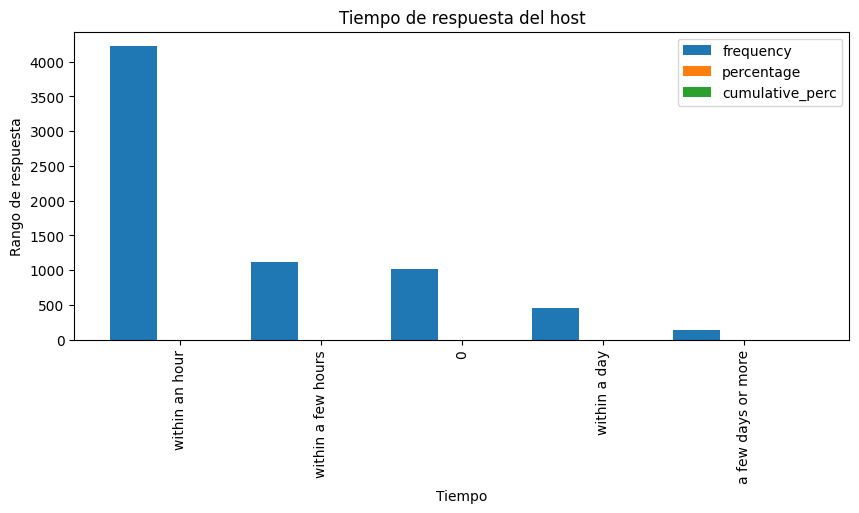

In [29]:
#Análisis univariable de una columna
hrt=freq_tbl(todo['host_response_time'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_hrt=hrt.set_index('host_response_time')
display(Filtro_hrt)

#Gráfica de barras
Filtro_hrt.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Tiempo de respuesta del host')
plt.xlabel('Tiempo')
plt.ylabel('Rango de respuesta')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
host_acceptance_rate,,,
1.00,2252,0.324683,0.324683
0.00,922,0.132930,0.457612
0.99,540,0.077855,0.535467
0.97,451,0.065023,0.600490
0.98,258,0.037197,0.637687
...,...,...,...
0.27,2,0.000288,0.999279
0.22,2,0.000288,0.999567
0.48,1,0.000144,0.999712


Text(0.5, 1.0, 'Tasa de aceptación del host')

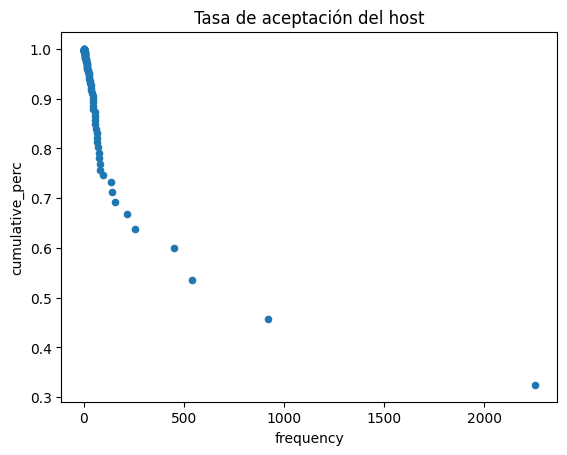

In [40]:
todo['host_acceptance_rate']=todo['host_acceptance_rate'].astype(object)

#Análisis univariable de una columna
har=freq_tbl(todo['host_acceptance_rate'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_har=har.set_index('host_acceptance_rate')
display(Filtro_har)

#Gráfica de dispersión
Filtro_har.plot("frequency", "cumulative_perc", kind="scatter")
plt.title('Tasa de aceptación del host')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,6106,0.880334,0.880334
f,830,0.119666,1.000000


Text(0.5, 1.0, 'Identidad verificada del host')

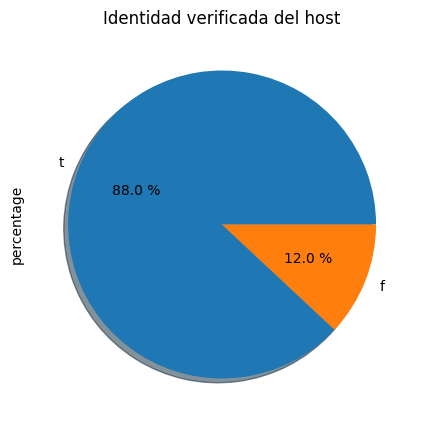

In [31]:
#Análisis univariable de una columna
hiv=freq_tbl(todo['host_identity_verified'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_hiv=hiv.set_index('host_identity_verified')
display(Filtro_hiv)

#Gráfica de pie
Filtro_hiv['percentage'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Identidad verificada del host')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,1848,0.266436,0.266436
Entire condo,879,0.126730,0.393166
Private room in home,853,0.122982,0.516148
Entire home,839,0.120963,0.637111
Entire guest suite,495,0.071367,0.708478
Private room in rental unit,471,0.067907,0.776384
Room in boutique hotel,352,0.050750,0.827134
Room in hotel,265,0.038206,0.865340
Private room in condo,192,0.027682,0.893022


Text(0.5, 1.0, 'Tipo de propiedad')

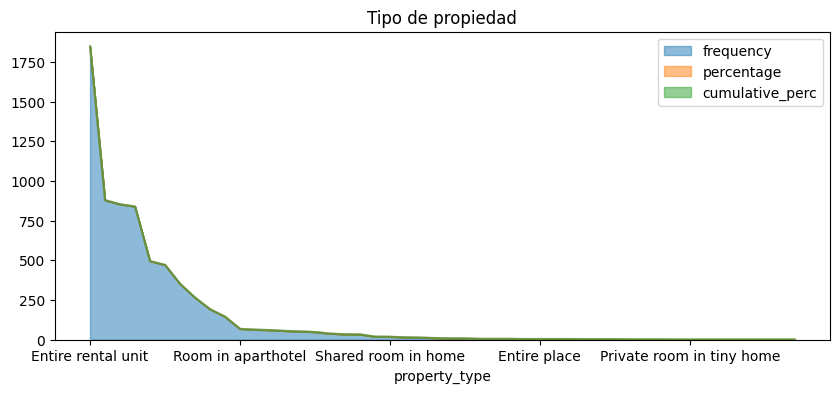

In [32]:
#Análisis univariable de una columna
pt=freq_tbl(todo['property_type'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_pt=pt.set_index('property_type')
display(Filtro_pt)

#Gráfica de área
Filtro_pt.plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.title('Tipo de propiedad')


 Estudio univariado de la columna


,frequency,percentage,cumulative_perc
number_of_reviews,,,
0,1325,0.191032,0.191032
1,578,0.083333,0.274366
2,402,0.057958,0.332324
3,292,0.042099,0.374423
4,243,0.035035,0.409458
...,...,...,...
360,1,0.000144,0.999423
438,1,0.000144,0.999567
362,1,0.000144,0.999712


Text(0.5, 1.0, 'Número de vistas')

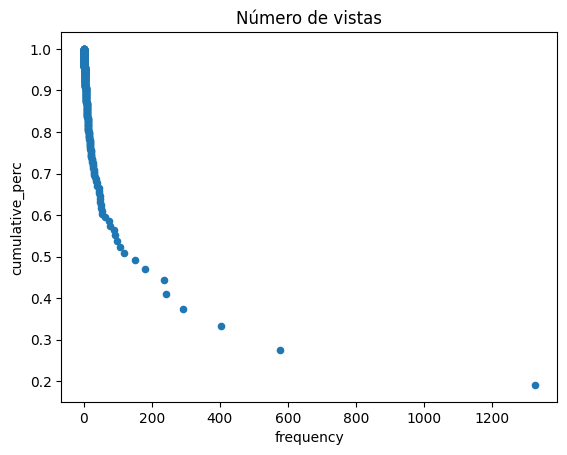

In [33]:
todo['number_of_reviews']=todo['number_of_reviews'].astype(object)
#Análisis univariable de una columna
nor=freq_tbl(todo['number_of_reviews'])

#Cambiamos el índice
print('\n Estudio univariado de la columna')
Filtro_nor=nor.set_index('number_of_reviews')
display(Filtro_nor)

#Gráfica de dispersión
Filtro_nor.plot("frequency", "cumulative_perc", kind="scatter")
plt.title('Número de vistas')